In [1]:
import numpy as np
import datetime as dt

from _fitting import *
from _utils import *

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rcParams['axes.grid'] = True
plt.rcParams['font.size'] = 14


WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
/var/folders/k6/79gt8yds1l3gsjyykhx8fr4r0000gn/T/ipykernel_12377/2676093710.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [54]:
ticker = "^NDX"

# set date range
ddays = 1590
end_date = dt.datetime.today()
start_date = end_date - dt.timedelta(days=ddays)

# interval
interval = "1d"
dtime = int(interval[:-1])

# Get the data
data = get_stock_data(ticker, start_date, end_date, interval=interval)

#---------------------#
Getting underlying data for ticker:  ^NDX
#---------------------#
[*********************100%***********************]  1 of 1 completed


In [75]:
data['Avg'] = (data['High'] + data['Low']) / 2

# Get the log returns
data['Log_Ret'] = np.log(data['Avg'] / data['Avg'].shift(1))

# Get the volatility
hrs = 252
data['Volatility'] = data['Log_Ret'].rolling(window=hrs).std() * np.sqrt(hrs)

# Get the drift
data['Drift'] = data['Log_Ret'].rolling(window=hrs).mean() * hrs


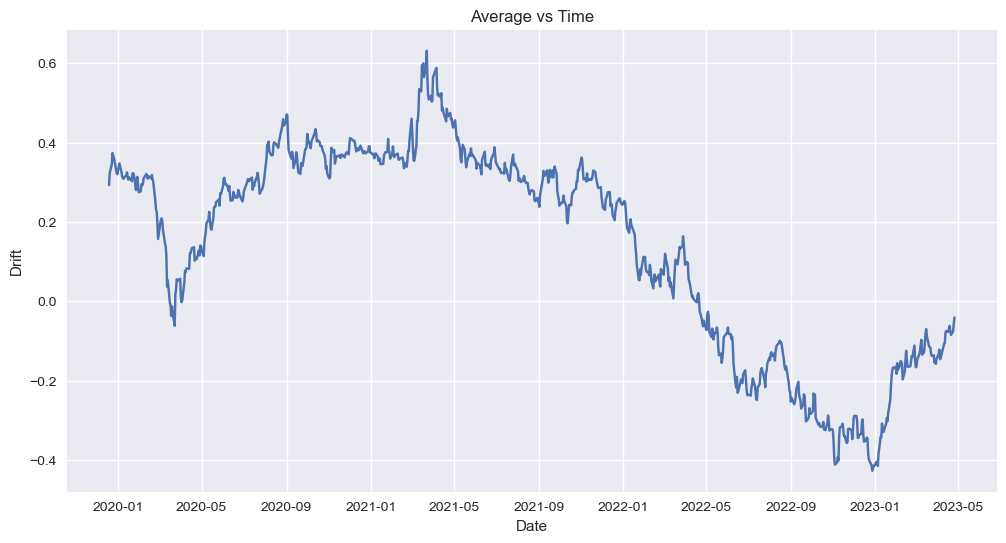

In [79]:
# plot average vs time for the last 20 days using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x=data.index, y=data['Drift'])
plt.title("Average vs Time")


plt.show()


In [52]:
# turn data index into datetime with hours and minutes
data.index = pd.to_datetime(data.index, format="%Y-%m-%d %H:%M:%S")